## Generate Test Data

In [1]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy
import scipy
import sklearn.cross_validation

n = 100

numpy.random.seed(0) # setting seed to keep data constant
x_noise = numpy.random.rand(n) * 0.05
numpy.random.seed(123456) # setting seed to keep data constant
y_noise = numpy.random.rand(n) * 7

x = scipy.linspace(0, 8, n)
x += x_noise

y = x * numpy.sin(x)
y += y_noise

x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x, y, test_size=0.3)

## Using Math Helpers
### Plotting different model functions at different model complexities

Cost Function with respect to given parameters ($\Theta$): $$J(\Theta) = \frac{1}{m} \sum\limits_{i=1}^n (h_\Theta(x^i) - y^i)^2$$

In [2]:
def get_error(predicted, actual):
    diff = predicted - actual
    return numpy.mean(numpy.square(diff))


def get_error_from_params(x, y, params):
    predicted = numpy.polyval(params, x)
    return get_error(predicted, y)

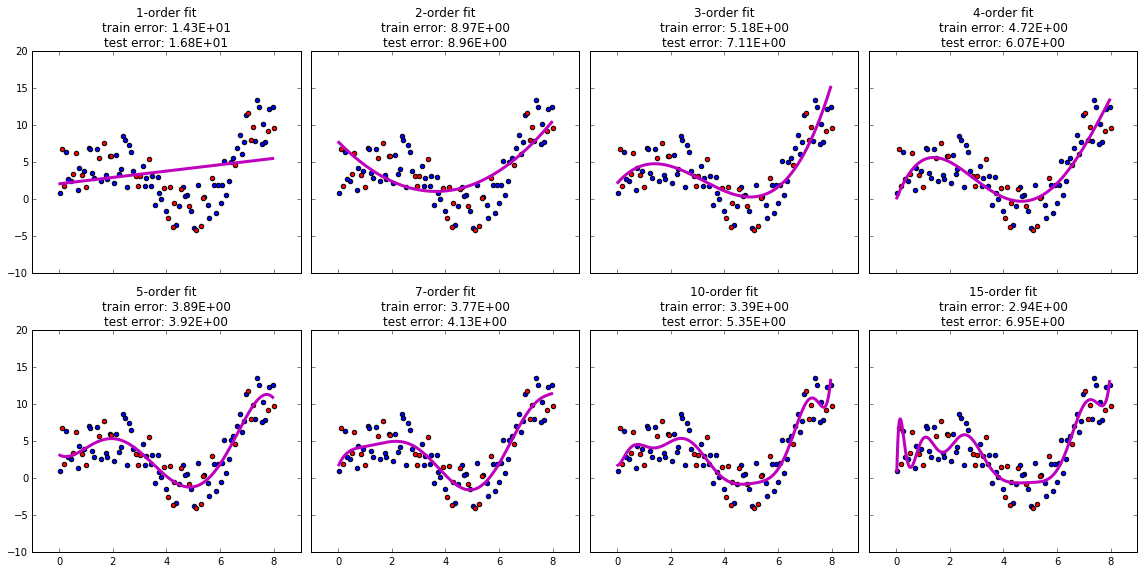

In [3]:
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, sharey=True, figsize=(16,8))
list_of_plot_pos = [(r,c) for r in range(n_rows) for c in range(n_cols)]

def add_plot_for_params(params):
    
    fx = scipy.linspace(numpy.min(x_train), numpy.max(x_train), 1000)
    fy = numpy.polyval(params, fx)
    
    train_error = get_error_from_params(x_train, y_train, params)
    test_error = get_error_from_params(x_test, y_test, params)
    
    (row,col) = list_of_plot_pos.pop(0)
    ax = axes[row, col]
    
    # ignoring constant with respect to polynomial order
    order = params.size - 1 
    ax.set_title('{0}-order fit\ntrain error: {1:.2E}\ntest error: {2:.2E}'.format(order, train_error, test_error))
    ax.scatter(x_train ,y_train)
    ax.scatter(x_test, y_test, c='r')
    
    # autoscale based only on the scatterplot
    # ax.autoscale(False) 
    ax.plot(fx,fy, linewidth=3, c='m')

for order in [1,2,3,4,5,7,10,15]:
    params = scipy.polyfit(x_train , y_train, order)
    add_plot_for_params(params)

plt.tight_layout()
plt.show()

### Plot model complexity effect on test and training error

order	training error	test error
0	1.53E+01	1.73E+01
1	1.43E+01	1.68E+01
2	8.97E+00	8.96E+00
3	5.18E+00	7.11E+00
4	4.72E+00	6.07E+00
5	3.89E+00	3.92E+00
6	3.87E+00	3.94E+00
7	3.77E+00	4.13E+00
8	3.77E+00	4.13E+00
9	3.60E+00	4.30E+00
10	3.39E+00	5.35E+00
11	3.38E+00	5.41E+00
12	3.19E+00	5.13E+00
13	3.03E+00	6.28E+00
14	2.95E+00	6.34E+00
15	2.94E+00	6.95E+00


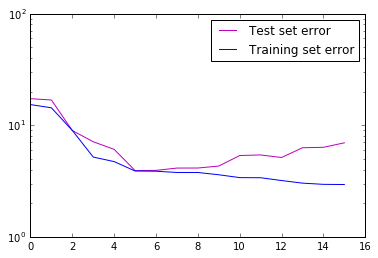

In [4]:
# TODO below

train_e = []
test_e = []
error_comparison_order_limit = 16
print('order\ttraining error\ttest error')
for n in range(error_comparison_order_limit):
    
    params = scipy.polyfit(x_train , y_train, n)
    fx = scipy.linspace(numpy.min(x_train), numpy.max(x_train), 1000)
    fy = numpy.polyval(params, fx)
    
    train_error = get_error_from_params(x_train, y_train, params)
    train_e.append(train_error)
    test_error = get_error_from_params(x_test, y_test, params) # TODO should be using a validation set here
    test_e.append(test_error)
    print('{0}\t{1:.2E}\t{2:.2E}'.format(n, train_error, test_error))
    
plt.semilogy(range(error_comparison_order_limit), test_e, c='m')
plt.semilogy(range(error_comparison_order_limit), train_e)
plt.legend(['Test set error', 'Training set error'])
plt.show()

## Using sklearn

/Users/matt/.virtualenvs/kaggle/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


order		test on training	kfold validation			true test
0		1.53E+01			1.58E+01				1.73E+01
1		1.43E+01			1.60E+01				1.68E+01
2		8.97E+00			9.82E+00				8.96E+00
3		5.18E+00			6.54E+00				7.11E+00
4		4.72E+00			5.98E+00				6.07E+00
5		3.89E+00			5.04E+00				3.92E+00
6		3.87E+00			6.23E+00				3.94E+00
7		3.77E+00			5.99E+00				4.13E+00
8		3.77E+00			9.38E+00				4.13E+00
9		3.60E+00			1.01E+01				4.30E+00
10		3.39E+00			2.08E+01				5.35E+00
11		3.38E+00			4.68E+01				5.41E+00
12		3.19E+00			1.51E+02				5.13E+00
13		3.03E+00			1.05E+02				6.28E+00
14		3.18E+00			1.27E+02				5.99E+00
15		3.28E+00			2.26E+02				5.77E+00

best order per validation testing: 5


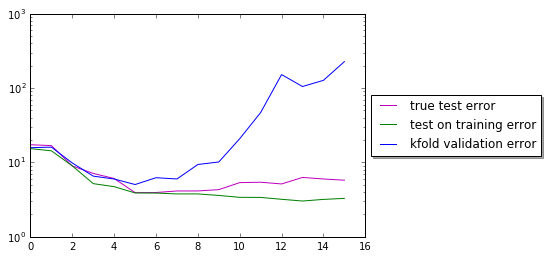

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def get_model(xs, ys, n_poly):
    model = make_pipeline(PolynomialFeatures(n_poly), LinearRegression())
    model.fit(xs.reshape(xs.size, 1), ys)
    return model


def get_predictions(model, xs):
    return model.predict(xs.reshape(xs.size, 1))
    
    
def get_poly_error(train__x, train__y, test__x, test__y, n_poly):
    model = get_model(train__x, train__y, n_poly)
    predictions = get_predictions(model, test__x)
    return get_error(predictions, test__y)
    
    
max_poly_order = 16
poly_orders = range(max_poly_order)

kf = KFold(x_train.size, shuffle=True, n_folds=3)
kfold_validation_error_list = []
for n_poly in poly_orders:
    errors = []
    for train_index, test_index in kf:
        e = get_poly_error(x_train[train_index], 
                           y_train[train_index], 
                           x_train[test_index], 
                           y_train[test_index], 
                           n_poly)
        errors.append(e)
    diff = numpy.mean(errors)
    kfold_validation_error_list.append(diff)
    
true_test_error_list = [get_poly_error(x_train, 
                                  y_train, 
                                  x_test, 
                                  y_test, 
                                  o) for o in poly_orders]
test_on_training_error_list = [get_poly_error(x_train, 
                                              y_train, 
                                              x_train, 
                                              y_train, 
                                              o) for o in poly_orders]

print('order\t\ttest on training\tkfold validation\t\t\ttrue test')
for o in poly_orders:
    print('{0}\t\t{1:.2E}\t\t\t{2:.2E}\t\t\t\t{3:.2E}'.format(o, 
                                                    test_on_training_error_list[o], 
                                                    kfold_validation_error_list[o], 
                                                    true_test_error_list[o]))

best_order = kfold_validation_error_list.index(min(kfold_validation_error_list))
test_error = get_poly_error(x_train, y_train, x_test, y_test, best_order) 
print('\nbest order per validation testing: {0}'.format(best_order))


plt.semilogy(poly_orders, true_test_error_list, c='m', label='true test error')
plt.semilogy(poly_orders, test_on_training_error_list, c='g', label='test on training error')
plt.semilogy(poly_orders, kfold_validation_error_list, label='kfold validation error')
plt.legend(loc='center left', 
           bbox_to_anchor=(1, 0.5), 
           shadow=True)
plt.show()

In [6]:
# TODO use ridge or lasso regresssion
# TODO use panda dataframe
# TODO add math formulas using latex
# TODO use one of scipy's built in cross-validation capabilities